<a href="https://colab.research.google.com/github/heyroha/DL/blob/main/Deep%20Learning/DL3_Mask_man_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dive to CNN

In [27]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_tr, y_tr), (x_t, y_t) = mnist.load_data()

x_tr,x_t = x_tr/255, x_t/255
x_tr= x_tr.reshape((60000,28,28,1))
x_t = x_t.reshape((10000,28,28,1))

In [28]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(3, kernel_size = (3,3),strides = (1,1), padding = 'same', activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPool2D(pool_size = (2,2), strides = (2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 588)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │         589,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 599,040 (2.29 MB)

 Trainable params: 599,040 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
#구성한 layer 호츌해보기

model.layers

[<Conv2D name=conv2d_5, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>]

In [33]:
# 아직 학습하지 않은 conv 레이어의 웨이트 평균
import numpy as np

conv = model.layers[0]
conv_w = conv.weights[0].numpy()
conv_w.mean(), conv_w.std()

(0.008986937, 0.22373812)

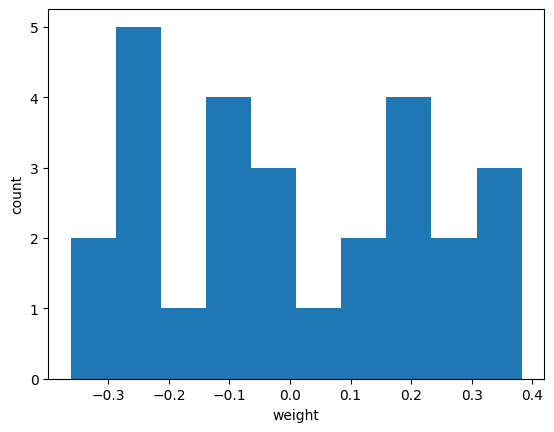

In [34]:
import matplotlib.pyplot as plt

plt.hist(conv_w.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show();

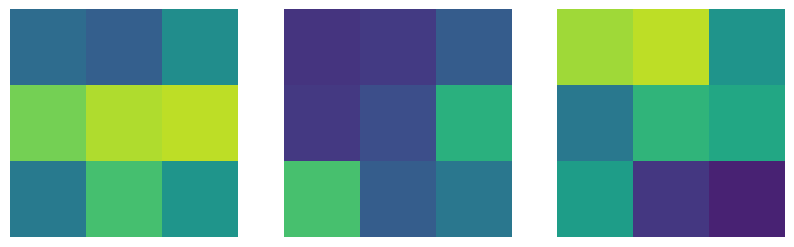

In [7]:
fig, ax = plt.subplots(1,3, figsize = (10,5))
for i in range(3):
  ax[i].imshow(conv_w[:,:,0,i], vmin = -0.5, vmax = 0.5)
  ax[i].axis('off')

plt.show();

In [8]:
%%time

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(x_tr,y_tr, epochs = 5, verbose = 1,validation_data=(x_t, y_t))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8784 - loss: 0.3967 - val_accuracy: 0.9717 - val_loss: 0.0822
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9642 - loss: 0.1095 - val_accuracy: 0.9762 - val_loss: 0.0747
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9749 - loss: 0.0774 - val_accuracy: 0.9818 - val_loss: 0.0542
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9800 - loss: 0.0623 - val_accuracy: 0.9850 - val_loss: 0.0482
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0489 - val_accuracy: 0.9823 - val_loss: 0.0502
CPU times: user 26.2 s, sys: 2.39 s, total: 28.6 s
Wall time: 30.6 s


In [9]:
conv = model.layers[0]
conv_w = conv.weights[0].numpy()
conv_w.mean(), conv_w.std()

(-0.027542489, 0.39280546)

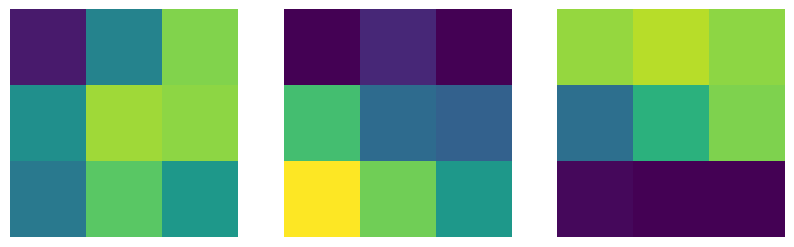

In [10]:
# 학습 후의 필터의 변화

fig, ax = plt.subplots(1,3, figsize = (10,5))
for i in range(3):
  ax[i].imshow(conv_w[:,:,0,i], vmin = -0.5, vmax = 0.5)
  ax[i].axis('off')

plt.show();

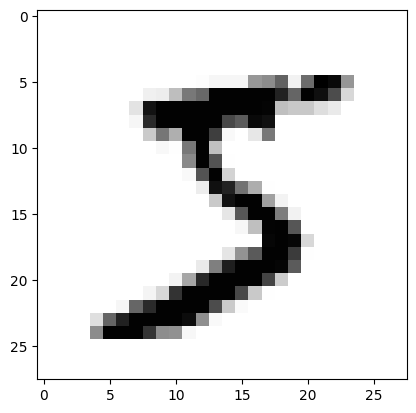

In [11]:
plt.imshow(x_tr[0], cmap = 'Greys');

In [26]:
model.layers

[<Conv2D name=conv2d_4, built=True>]